In [1]:
%store -r X
%store -r y
%store -r X_test
%store -r y_test
%store -r feature_names

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

X_2d = X.reshape(-1, X.shape[-1])
y_2d = np.repeat(y, 20)

In [16]:
# Define the logistic regression model
model = LogisticRegression()

# Define the forward selection object
sfs = SFS(model,
          k_features=10,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

# Perform forward selection on the training set
sfs.fit(X_2d, y_2d)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(10, 10),
                          scoring='accuracy')

In [4]:
import matplotlib.pyplot as plt

Selected Features: ('13', '14', '16', '19', '118')
Accuracy: 0.41886026825071204


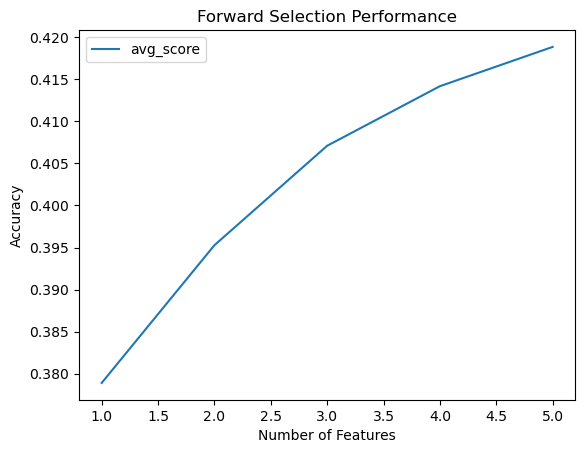

In [5]:
# Print the selected features
print('Selected Features:', sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print('Accuracy:', accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df['avg_score'] = sfs_df['avg_score'].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind='line', y='avg_score', ax=ax)
ax.set_xlabel('Number of Features')
ax.set_ylabel('Accuracy')
ax.set_title('Forward Selection Performance')
plt.show()

In [6]:
int_array = [int(element) for element in sfs.k_feature_names_]

In [8]:
selected_X = X[:,:,int_array]
selected_X_test = X_test[:,:,int_array] 

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Khởi tạo mô hình
model = keras.Sequential()

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(20, 5, 1), padding='same'))

# Thêm lớp Convolutional Layer với 32 bộ lọc kích thước 5x5 và hàm kích hoạt ReLU
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Convolutional Layer với 64 bộ lọc kích thước 3x3 và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))

# Thêm lớp Max Pooling 2D để giảm kích thước đầu vào đi 2 lần
model.add(layers.MaxPooling2D((2, 2)))

# Thêm lớp Flatten để làm phẳng đầu ra của lớp trước khi đi vào các lớp fully connected
model.add(layers.Flatten())

# Thêm lớp fully connected (Dense Layer) với 64 units và hàm kích hoạt ReLU
model.add(layers.Dense(64, activation='relu'))

# Thêm lớp Dropout để giảm hiện tượng overfitting
model.add(layers.Dropout(0.5))

# Thêm lớp fully connected (Dense Layer) cuối cùng với số lớp đầu ra phụ thuộc vào bài toán của bạn
model.add(layers.Dense(5, activation='softmax'))

# In thông tin mô hình
model.summary()

# Biên dịch mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 5, 32)         832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 5, 32)         25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 2, 32)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 2, 32)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 2, 64)         51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 2, 64)         102464    
                                                     

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(selected_X, y, epochs=10, batch_size=16)

Epoch 1/10


823/823 [==============================] - 8s 8ms/step - loss: 0.9277 - accuracy: 0.5990
Epoch 2/10
823/823 [==============================] - 7s 8ms/step - loss: 0.6730 - accuracy: 0.7232
Epoch 3/10
823/823 [==============================] - 6s 7ms/step - loss: 0.5627 - accuracy: 0.7854
Epoch 4/10
823/823 [==============================] - 7s 8ms/step - loss: 0.4896 - accuracy: 0.8189
Epoch 5/10
823/823 [==============================] - 6s 8ms/step - loss: 0.4363 - accuracy: 0.8429
Epoch 6/10
823/823 [==============================] - 6s 8ms/step - loss: 0.4034 - accuracy: 0.8577
Epoch 7/10
823/823 [==============================] - 6s 8ms/step - loss: 0.3749 - accuracy: 0.8650
Epoch 8/10
823/823 [==============================] - 7s 8ms/step - loss: 0.3563 - accuracy: 0.8745
Epoch 9/10
823/823 [==============================] - 7s 8ms/step - loss: 0.3445 - accuracy: 0.8788
Epoch 10/10
823/823 [==============================] - 7s 8ms/step - loss: 0.3296 - accuracy: 0.88

In [13]:
# Đánh giá mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(selected_X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

# Dự đoán các nhãn trên tập kiểm tra
y_pred = model.predict(selected_X_test)

# Chuyển đổi dự đoán thành nhãn dự đoán (lớp dự đoán)
y_pred_classes = np.argmax(y_pred, axis=1)

# Hiển thị ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_pred_classes)
print("Ma trận nhầm lẫn:")
print(confusion)

# Hiển thị báo cáo phân loại
class_report = classification_report(y_test, y_pred_classes)
print("Báo cáo phân loại:")
print(class_report)

412/412 [==============================] - 3s 6ms/step - loss: 0.2619 - accuracy: 0.9036
Độ chính xác trên tập kiểm tra: 0.9036153554916382
412/412 [==============================] - 2s 6ms/step
Ma trận nhầm lẫn:
[[2842    0    0    0    0]
 [   3 1973   23    3   32]
 [   0   59 2615    3  131]
 [   3  335   17 1380    5]
 [   2   68  584    1 3087]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2842
           1       0.81      0.97      0.88      2034
           2       0.81      0.93      0.86      2808
           3       0.99      0.79      0.88      1740
           4       0.95      0.82      0.88      3742

    accuracy                           0.90     13166
   macro avg       0.91      0.90      0.90     13166
weighted avg       0.91      0.90      0.90     13166

